X 的形状: (100, 2)
y 的形状: (100,)
训练集 X 形状: (80, 2)


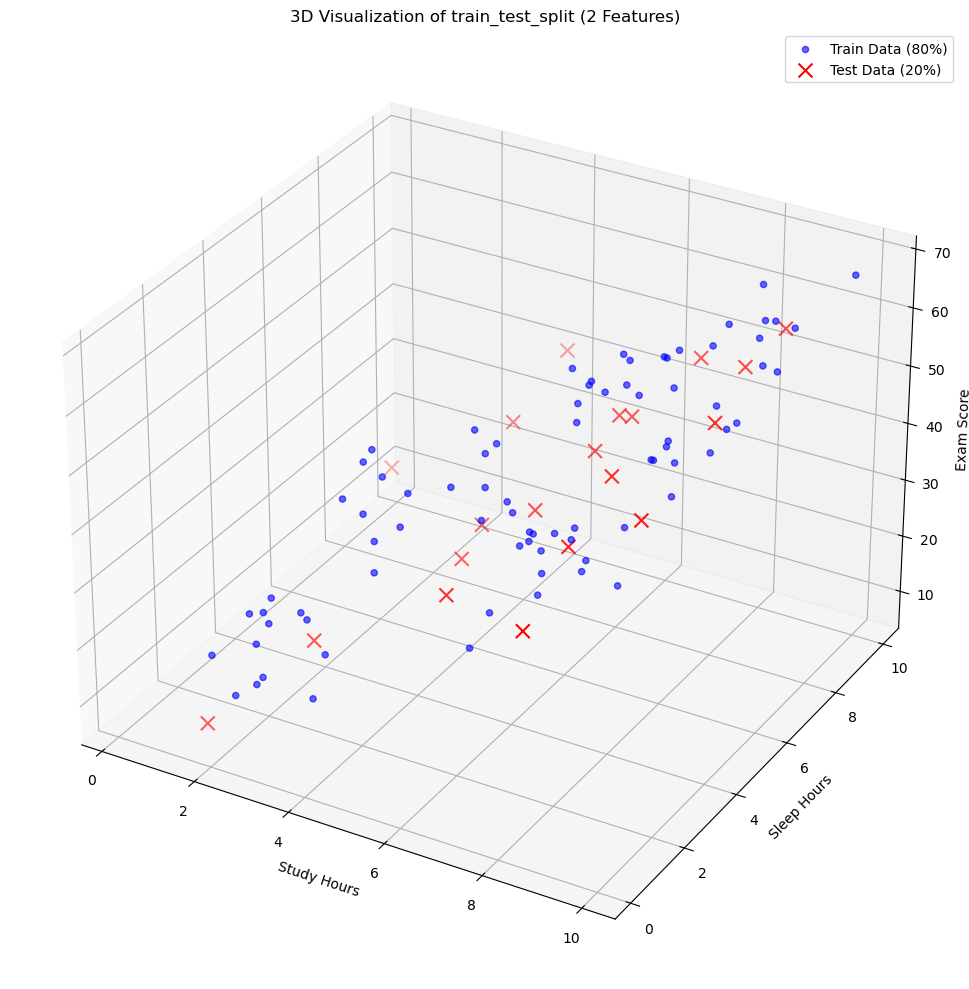

In [17]:
# 数据集拆分
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


n_samples = 100

# X 是特征：学习时长、睡眠时长 (100行, 2列)
# random.rand 生成 [0,1) 之间的均匀分布数值，乘以10让数值范围0~10
# random.randn 生成标准正态分布数值
X = np.random.rand(n_samples, 2) * 10 

# y 是成绩：我们造一个公式 y = 5*学习 + 2*睡眠 + 噪声
# X[:, 0]：取表格中第 1 列的所有数据（学习时长）ndarray
y = 5 * X[:, 0] + 2 * X[:, 1] + np.random.randn(n_samples) * 2

# 现在 X 是 (100, 2)，y 是 (100,)，对齐
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


print(f"X 的形状: {X.shape}") #  (100, 2)
print(f"y 的形状: {y.shape}") #  (100,)
print(f"训练集 X 形状: {X_train.shape}") # (80, 2)


fig = plt.figure(figsize=(10,10)) # 画布
ax = fig.add_subplot(111, projection='3d') # 三维坐标系
# 行数、列数、第几个子图 111 表示 1 行 1 列的第 1 个图 即画布就这一张图
# 2D 散点图用 ax = fig.add_subplot(111) 两个特征需要三维图

# 绘制训练集：蓝色圆点
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, 
           color='blue', label='Train Data (80%)', alpha=0.6)

# 绘制测试集：红色叉号
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, 
           color='red', label='Test Data (20%)', marker='x', s=100)

ax.set_xlabel('Study Hours')
ax.set_ylabel('Sleep Hours')
ax.set_zlabel('Exam Score')
plt.title("3D Visualization of train_test_split (2 Features)")
plt.legend()
plt.tight_layout()
plt.show()

机器猜的系数 (对应我们设的 5): 4.89
机器猜的截距 (对应我们设的 2): 2.78


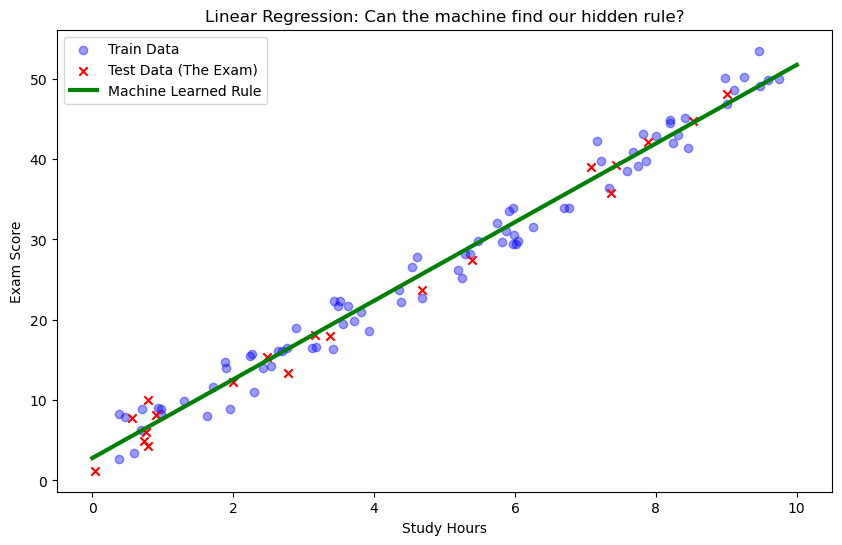

In [ ]:
# print(X[:5])  查看前5行特征数据
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # 导入线性回归模型

X = np.random.rand(100, 1) * 10  # 100个学生的学习时间 (0-10)
y = 5 * X.flatten() + 2 + np.random.randn(100) * 2 
# 成绩 = 5*学习 + 2 + 噪声

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train) 

print(f"机器猜的系数 (对应我们设的 5): {model.coef_[0]:.2f}")
print(f"机器猜的截距 (对应我们设的 2): {model.intercept_:.2f}")

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.4) 
plt.scatter(X_test, y_test, color='red', label='Test Data (The Exam)', marker='x')

x_line = np.linspace(0, 10, 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='green', linewidth=3, label='Machine Learned Rule')

plt.title("Linear Regression: Can the machine find our hidden rule?")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.legend()
plt.show()